In [ ]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, soundfile as sf
import torch, sys, os
from IPython.display import display, Audio

# From 448 Lab 1 solutions
def stft( input_sound, dft_size, hop_size, zero_pad):
    from numpy import array
    from numpy.fft import rfft
    input_sound = np.concatenate((np.zeros(dft_size), np.mean(input_sound, axis=0), np.zeros(dft_size)), axis=0)
    return rfft( np.hanning(dft_size) * array( [input_sound[i:i+dft_size] for i in range( 0, len( input_sound)-dft_size, hop_size)]), axis=-1, n=dft_size+zero_pad).T

DATA: str = '/mnt/data2/evanmm3/'

## Basic Rewording

In [2]:
data = pd.read_csv('out.csv')
data2 = pd.read_csv('out2.csv')

print(f'cos-sim  Avg   Std.  Var.')
print(f'Batch 1: {np.average(data["cosine_similarity"]):.3f} {np.std(data["cosine_similarity"]):.3f}, {np.var(data["cosine_similarity"]):.3f}')
print(f'Batch 2: {np.average(data2["cosine_similarity"]):.3f} {np.std(data2["cosine_similarity"]):.3f}, {np.var(data2["cosine_similarity"]):.3f}')

print(f'\nl2-dist  Avg   Std.  Var.')
print(f'Batch 1: {np.average(data["l2_distance"]):.3f} {np.std(data["l2_distance"]):.3f}, {np.var(data["l2_distance"]):.3f}')
print(f'Batch 2: {np.average(data2["l2_distance"]):.3f} {np.std(data2["l2_distance"]):.3f}, {np.var(data2["l2_distance"]):.3f}')

cos-sim  Avg   Std.  Var.
Batch 1: 0.844 0.192, 0.037
Batch 2: 0.744 0.216, 0.046

l2-dist  Avg   Std.  Var.
Batch 1: 0.430 0.355, 0.126
Batch 2: 0.650 0.299, 0.090


### Individual Example Analysis

MSE:  0.0
Basic:  Formula 1 race cars passing by
reword: Formula 1 race cars passing by
(513, 1727)


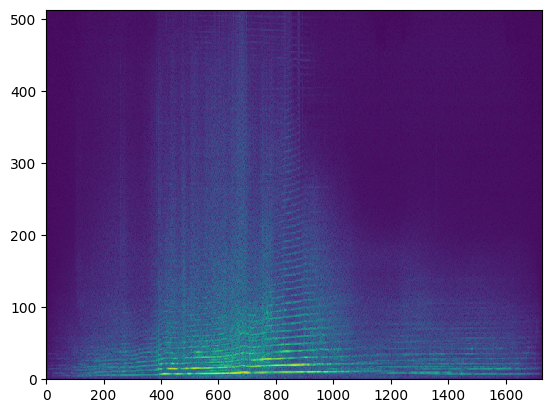

In [ ]:
def load_example(num: int = 0, var: int = 0, compare: str = 'reword') -> tuple[Audio, Audio]:
    assert var in range(0, 3), 'var must be [0, 3)'
    assert num in range(0, 1000), 'num must be [0, 1000)'
    
    x, sr = sf.read(DATA + f'basic/sound_{num}_{var}.wav'); x = x.T
    x2, sr2 = sf.read(DATA + f'{compare}/sound_{num}_{var}.wav'); x2 = x2.T
    print('MSE: ', np.mean(np.square(x - x2)))

    prompts = pd.read_csv('sound_prompts.csv'); print('Basic: ', prompts['prompt_text'][num])

    if compare == 'reword':
        prompts2 = pd.read_csv('sound_prompts2.csv'); print(f'{compare}:', prompts2['prompt_text'][num])
    elif compare == 'reword2':
        prompts3 = pd.read_csv('sound_prompts3.csv'); print(f'{compare}:', prompts3['prompt_text'][num])

    dft = 1024
    # To do: show as multiple plots
    plt.pcolormesh(_ := np.abs(stft(x, dft, dft//4, 0))**0.25); print(_.shape)
    plt.pcolormesh(np.abs(stft(x2, dft, dft//4, 0))**0.25)

    return (display(Audio(x, rate=sr)), display(Audio(x2, rate=sr2)))

_ = load_example(420, 0)

## TI Rewording